<a href="https://colab.research.google.com/github/shravyagulaigari/Python-2/blob/main/Python_Day____12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


import pandas as pd
import re

ps=pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')

Mounted at /content/gdrive


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Mean Squared Error: 417.7544925
R-squared (Accuracy): 0.15304011738707313


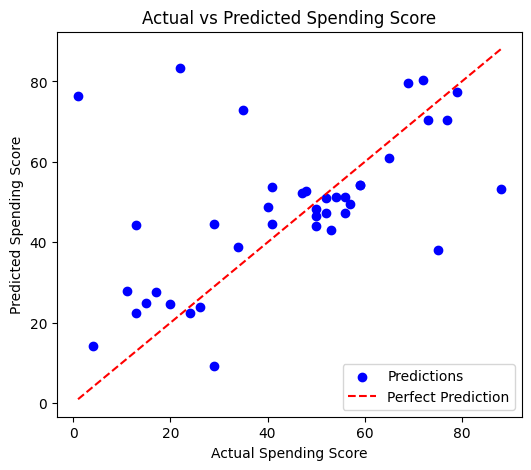

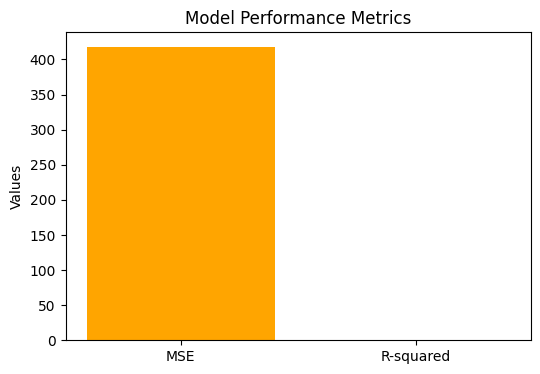

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
ds = pd.read_csv('/content/gdrive/My Drive/CRT_PYTHON_22BK1A7248/Shopping_data.csv')
print(ds.head())

# Use all numeric features except target
X = ds.drop(columns=['Spending Score (1-100)']).select_dtypes(include=[np.number])
y = ds['Spending Score (1-100)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (Accuracy):", r2)

# --- Actual vs Predicted Graph ---
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction")
plt.title("Actual vs Predicted Spending Score")
plt.xlabel("Actual Spending Score")
plt.ylabel("Predicted Spending Score")
plt.legend()
plt.show()

# --- Bar Graph for Metrics ---
plt.figure(figsize=(6,4))
plt.bar(['MSE', 'R-squared'], [mse, r2], color=['orange','green'])
plt.title("Model Performance Metrics")
plt.ylabel("Values")
plt.show()
